In [1]:
import random
from skimage import io

# Data 

Okay pretty simple for the pascal dataset. We have VOCdevit/VOC2010. Inside there is a folder called JPEGImages with all the data, a folder called SegmentatinClass for semantic segmentation, a folder SegmentationObject for instance segmentatoin.
In the folder ImageSets/Segmentation there is a train, trainval and val split txt with the filenames of the imagesets for segmentation in each set.

In [2]:
d = "data/VOCdevkit/VOC2010/"

with open(f"{d}ImageSets/Segmentation/train.txt") as f:
    train = f.read().splitlines()
with open(f"{d}ImageSets/Segmentation/trainval.txt") as f:
    trainval = f.read().splitlines()
with open(f"{d}ImageSets/Segmentation/val.txt") as f:
    val = f.read().splitlines()

train[:2], trainval[:2], val[:2]

(['2007_000032', '2007_000039'],
 ['2007_000032', '2007_000033'],
 ['2007_000033', '2007_000042'])

In [3]:
with open(f"data/labels.txt") as f:
    labels = f.read().splitlines()

In [4]:
labels[:20]

['1: accordion',
 '2: aeroplane',
 '3: air conditioner',
 '4: antenna',
 '5: artillery',
 '6: ashtray',
 '7: atrium',
 '8: baby carriage',
 '9: bag',
 '10: ball',
 '11: balloon',
 '12: bamboo weaving',
 '13: barrel',
 '14: baseball bat',
 '15: basket',
 '16: basketball backboard',
 '17: bathtub',
 '18: bed',
 '19: bedclothes',
 '20: beer']

# Check data generator for pascal

In [5]:
from pascal import *

def image_sequentialisation(image, label):
    """
    # TODO : batch dim?
    Convert image into sequence: f : R^(H x W x 3) -> R^(n x -1) # n flattened patches
    L = HW / 256

    So essentially divid image into 16x16 grid. -> input should be dividsible by 16

    """
    # start with loopy implementation
    steps = image_size // 16
    # patches = tf.zeros((batch_size, steps * steps, 16 * 16 * 3))
    patches = []
    for i in range(steps):
        for j in range(steps):
            patch = image[:, i * 16 : (i + 1) * 16, j * 16 : (j + 1) * 16, :]
            flatten_patch = tf.reshape(patch, shape=(batch_size, -1))
            patches.append(flatten_patch)
    patches = tf.stack(patches)
    sequence = tf.reshape(patches, shape=(batch_size, steps * steps, 16 * 16 * 3))
    return sequence, label

image_size = 512
seq_len = 1024  # 32 * 32 for (image_size=512)//16 patches
d_model = 512
batch_size = 8

pdg = PascalDataGenerator(image_size=image_size, batch_size=batch_size)
tfds = tf.data.Dataset.from_generator(
    pdg.data_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([batch_size, image_size, image_size, 3], [batch_size, image_size, image_size, 1]),
)
tfds_mapped = tfds.map(image_sequentialisation)

2023-04-15 14:53:56.146684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 14:53:56.639349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-15 14:53:56.639404: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-15 14:53:56.639409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
tfds

<FlatMapDataset element_spec=(TensorSpec(shape=(8, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(8, 512, 512, 1), dtype=tf.float32, name=None))>

In [7]:
import matplotlib.pyplot as plt



there are 964 training examples
[ 0.  2.  3.  5.  8.  9. 11. 15. 20.]
there are 964 training examples
[ 0.  1.  3.  7.  8. 12. 13.]
there are 964 training examples
[ 0.  1.  2.  8. 12. 15. 19. 20.]
there are 964 training examples
[ 0.  1.  2.  4. 10. 12. 15. 17. 19.]
there are 964 training examples
[ 0.  1.  2.  8.  9. 11. 14. 15. 16. 17. 18. 20.]


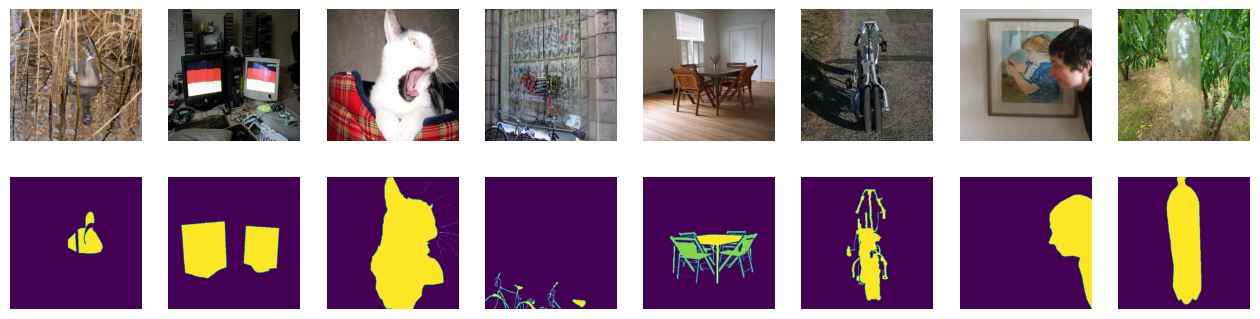

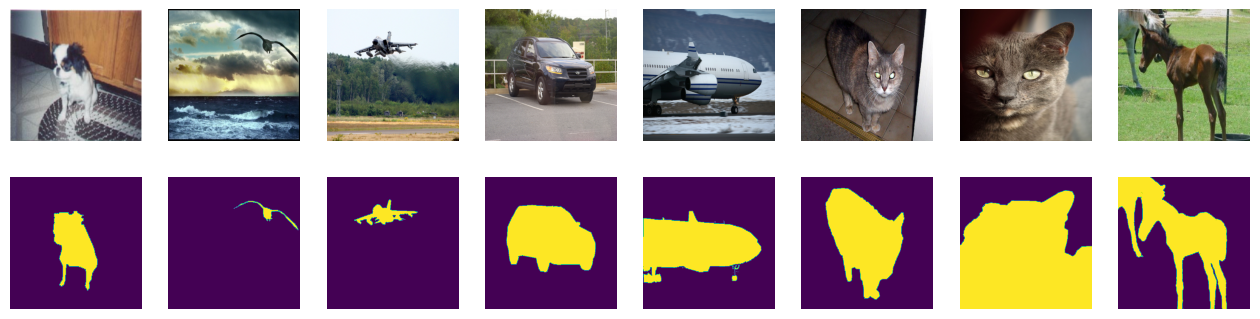

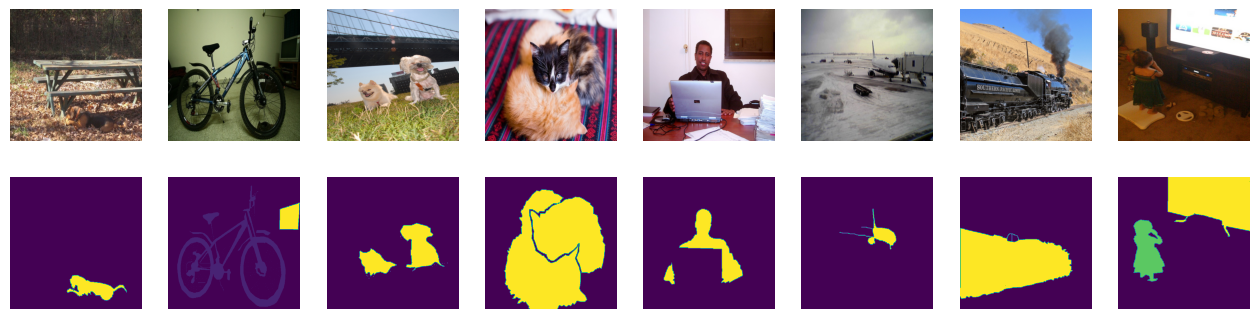

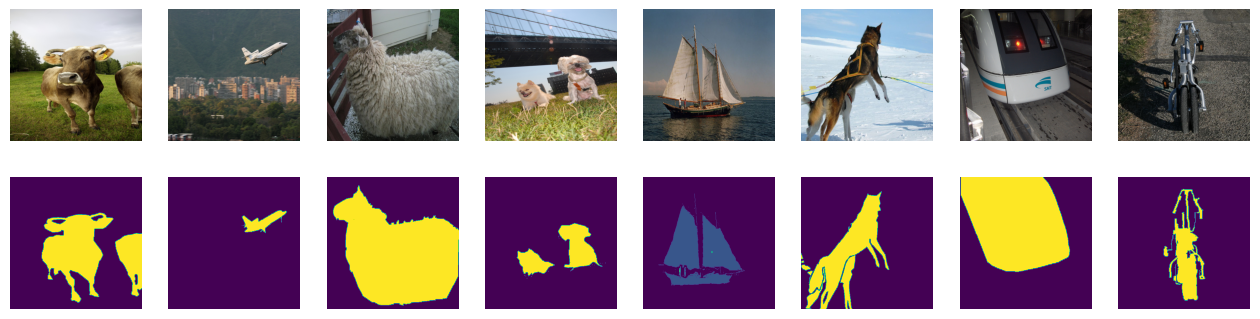

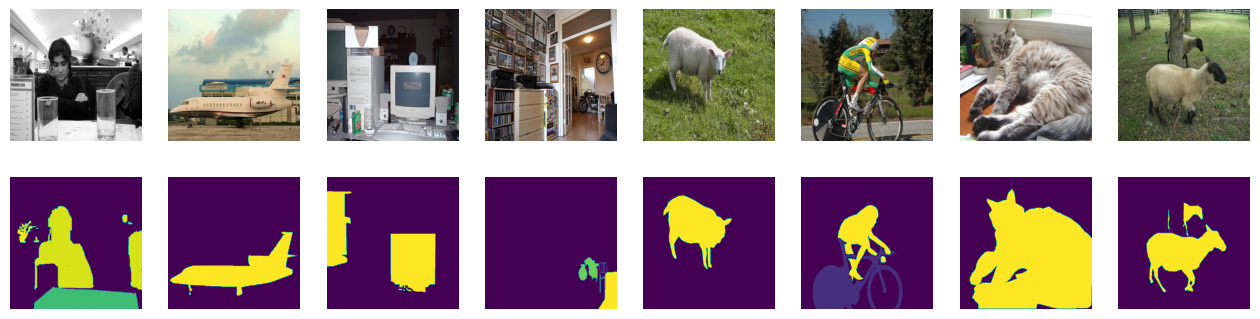

In [8]:
for _ in range(5):
    batch = next(iter(tfds))
    batch[0].shape, batch[1].shape
    print(np.unique(batch[1]))
    fig, axs = plt.subplots(2,8, figsize=(16, 4))
    for i in range(2):
        for j in range(8):
            axs[0,j].imshow(batch[0][j].numpy() / 255)
            axs[1,j].imshow(batch[1][j].numpy()/ 255)
            axs[0,j].axis('off')
            axs[1,j].axis('off')

(281, 500, 3)


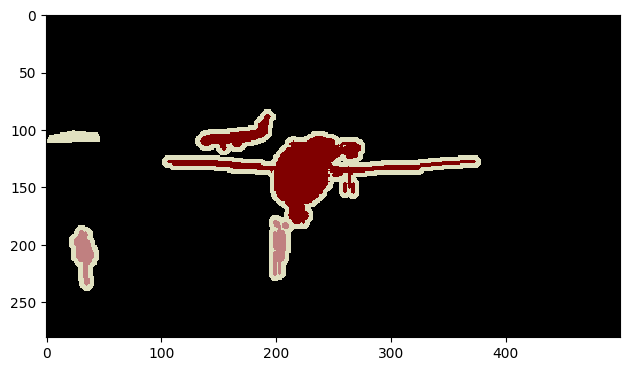

In [9]:
from skimage import io
X = io.imread('data/VOCdevkit/VOC2010/SegmentationClass/2007_000032.png')[...,:3]
print(X.shape)
io.imshow(X)

In [10]:
np.unique(X, return_counts=True)

(array([  0, 128, 192, 224], dtype=uint8),
 array([398103,   6466,   6221,  10710]))

In [11]:
from PIL import Image

X = np.array(Image.open('data/VOCdevkit/VOC2010/SegmentationClass/2007_000032.png'))
print(X.shape)

(281, 500)


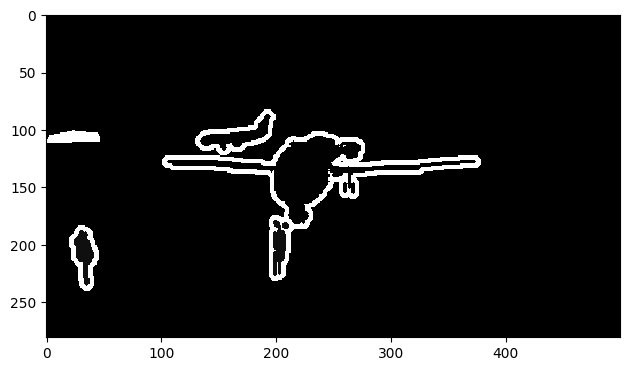

In [12]:
io.imshow(X)

In [13]:
np.unique(X, return_counts=True)

(array([  0,   1,  15, 255], dtype=uint8),
 array([129545,   4734,    866,   5355]))